In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号 

import scipy.interpolate as spip

path = 'dataresult/'

In [46]:
df = pd.read_excel('Data.xlsx')
df=df.sort_values(by='旋钮刻度')
df

,旋钮刻度,相对延迟/us,绝对延迟,符合计数,Unnamed: 4,刻度5处的绝对延迟,Unnamed: 6,5.12
0,0.00,-4.560,0.560,0.000000,NaN,NaN,NaN,NaN
1,1.00,-3.720,1.400,0.000000,NaN,NaN,NaN,NaN
2,2.00,-2.760,2.360,0.000000,NaN,NaN,NaN,NaN
3,3.00,-1.740,3.380,0.000000,NaN,NaN,NaN,NaN
4,4.00,-0.780,4.340,0.000000,NaN,NaN,NaN,NaN
6,4.25,-0.512,4.608,0.000000,NaN,NaN,NaN,NaN
8,4.29,-0.468,4.652,4.333333,4.0,4.0,5.0,NaN
7,4.30,-0.448,4.672,1827.000000,NaN,NaN,NaN,NaN
5,5.00,0.256,5.376,1827.000000,NaN,NaN,NaN,NaN
10,5.20,0.450,5.570,1827.000000,NaN,NaN,NaN,NaN


In [47]:
scale = df['旋钮刻度'].values
delay = df['绝对延迟'].values
delay_re = df['相对延迟/us'].values
count = df['符合计数'].values

# 电子学符合曲线的绘制

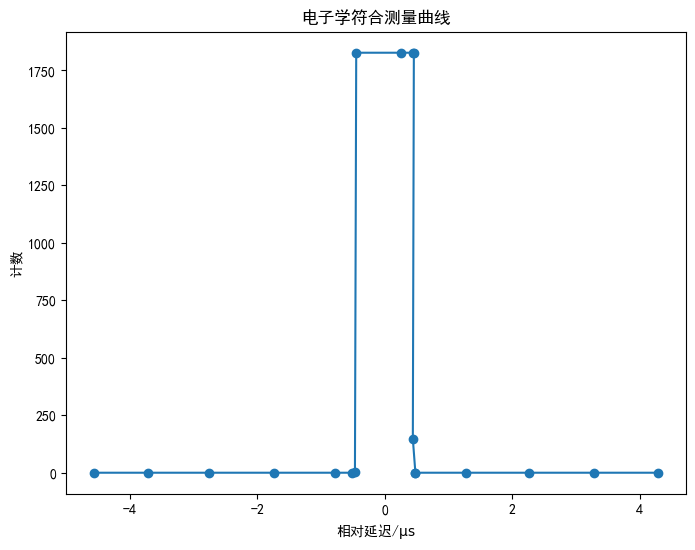

In [48]:
plt.figure(figsize=(8,6))
plt.plot(delay_re,count,'-o')
plt.title('电子学符合测量曲线')
plt.xlabel(r'相对延迟/$\mathrm{\mu s}$')
plt.ylabel('计数')
plt.savefig(path+'Electronical Coincidence Curve.pdf')
plt.show()

# $\beta$ 旋钮定标

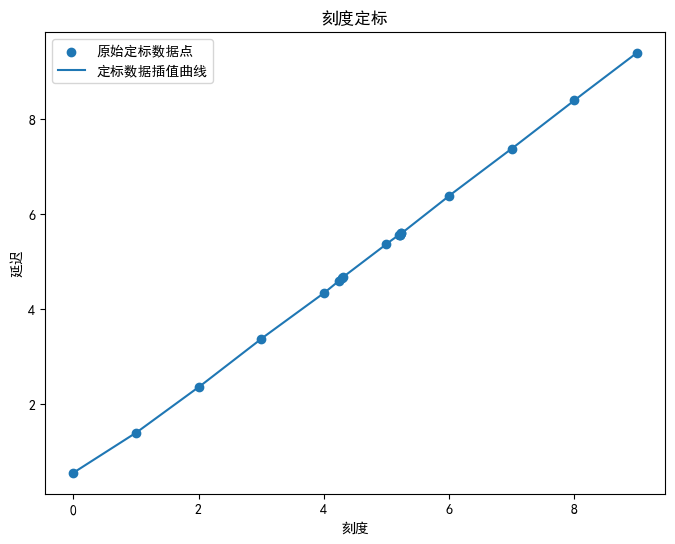

In [49]:
interp = spip.interp1d(scale, delay)


x_interp = np.linspace(min(scale), max(scale), 1000)
y_interp = interp(x_interp)

plt.figure(figsize=(8,6))
plt.scatter(scale, delay, label='原始定标数据点')
plt.plot(x_interp, y_interp, label='定标数据插值曲线')
plt.legend()
plt.xlabel('刻度')
plt.ylabel('延迟')
plt.title('刻度定标')
plt.savefig(path+'calibration.pdf')
plt.show()